# Imports and Functions

In [58]:
import pandas as pd
import numpy as np

In [59]:
def find_key(row, key):
    '''
    Find specific key in row['Keys'] for each row of a pandas table
    '''
    if type(row['Keys']) == float:
        return False
    if key in row['Keys'].split('/'):
        return True
    return False

In [60]:
def count_keyword(df, keyword):
    '''
    Prints out number of facilities with the key word, then
    count number of facilities with a certain key at zipcode level.
    '''
    df[keyword] = df.apply(lambda row: find_key(row, keyword), axis=1)
    print((len(df), len(df[df[keyword] == True])))
    df_key = df.groupby(['ZIP_Code', keyword]).size().to_frame().reset_index()
    #rename count
    df_key.rename(columns={0:'Count'}, inplace=True) 
    #pivot table
    df_key = df_key.pivot_table('Count', ['ZIP_Code'], keyword).reset_index()
    #delete index name
    df_key.columns.name = None
    df_key.fillna(0, inplace=True)
    if type(df_key['ZIP_Code'][0]) == np.int64:
        df_key['ZIP_Code'] = ["{:05d}".format(zipcode) for zipcode in df_key['ZIP_Code']]
    else:
        df_key['ZIP_Code'] = ["{:05d}".format(int(zipcode[:5])) for zipcode in df_key['ZIP_Code']]
    df_key.columns = ['ZIP_Code', 'With_{}'.format(keyword), 'Without_{}'.format(keyword)]
    return df_key

# Analyze data

### 1998

In [61]:
df1998 = pd.read_csv("{0}/{0}_c.csv".format(1990))
df1998_MM = count_keyword(df1998, 'MM')

(10655, 657)


### 2003 data
- Methadone: 
    - MM: Methadone/LAAM maintenance
    - DM: Methadone/LAAM detoxification
- Buprenorphine (Prescribe physicians)
- Naltrexone (Extended release - injectable naltrexone)

In [63]:
df2003 = pd.read_csv("2003/2003_c.csv")
#df2003

In [64]:
df2003_MM = count_keyword(df2003, 'MM')
#df2003_MM

(11591, 934)


### 2007 data
- Methadone: 
    - MM: Methadone maintenance
    - DM: Methadone detoxification
- Buprenorphine (Prescribe physicians)
    - BU: Buprenorphine used in treatment
- Naltrexone (Extended release - injectable naltrexone)
    - ?

In [8]:
year = 2007
df2007 = pd.read_csv("{0}/{0}.csv".format(year))
df2007

,Year,Page,Center_name,Street_address,City,State,Postal_code,Phone,Keys
0,2007,15,Lighthouse of Tallapoosa County Inc Substance ...,36 Franklin Street,Alexander City,AL,35010,(256) 234-4894,SA TX HH RL MN SF
1,2007,15,Anniston Fellowship House Inc,106 East 22nd Street,Anniston,AL,36201,(256) 236-7229,SA TX HH RL MN SF
2,2007,15,Bridge Inc Recovery Center for Teens/Ashville,474 10th Street,Ashville,AL,35953,(205) 594-3111,SA TX OP AD CO CJ SF MD SI PI MI SS PA
3,2007,15,Rapha Christian Home,677 West Covington Avenue,Attalla,AL,35954,(256) 538-7458,SA TX HH RL SF
4,2007,15,Northwest Alabama Treatment Center,4204 Edmonton Drive,Bessemer,AL,35022,(205) 425-1200Methadone Clients Only,SA TX MM OP PW SF AH
...,...,...,...,...,...,...,...,...,...
10517,2007,679,Wyoming SA Trt and Recovery Centers (WYSTAR) ˝...,1003 Saberton Street,Sheridan,WY,82801,(307) 672-2044,SA TX DT HH RS RL CO WN BC SF MD MC SI PI MI SS
10518,2007,679,Hot Springs County Counseling Service,121 South 4th Street,˝ermopolis,WY,82443,(307) 864-3138,MH-SA TX OP DU SF MD SI PI MI AR SS PA
10519,2007,679,Peak Wellness Center Goshen County Clinic,501 Albany Avenue,Torrington,WY,82240,(307) 532-4091,MH-SA TX OP AD DU SF MD MC SI PI MI SS
10520,2007,679,Peak Wellness Center Substance Abuse Services,103 Park Avenue,Wheatland,WY,82201,(307) 322-3190Hotline: (307) 322-3190,MH-SA TX OP CO DU SF MD MC SI PI MI SS


In [9]:
df2007_MM = count_keyword(df2007, 'MM')

(10522, 887)


In [10]:
df2007_DM = count_keyword(df2007, 'DM')

(10522, 617)


In [11]:
df2007_BU = count_keyword(df2007, 'BU')

(10522, 302)


### 2012 data
- Methadone: 
    - MM: Methadone maintenance
    - DM: Methadone detoxification
- Buprenorphine (Prescribe physicians)
    - BU: Buprenorphine used in treatment
- Naltrexone (Extended release - injectable naltrexone)
    - ?

In [12]:
year = 2012
df2012 = pd.read_csv("{0}/{0}.csv".format(year))
df2012

,Year,Page,Center_name,Street_address,City,State,Postal_code,Phone,Keys
0,2012,15,SpectraCare Henry Co IOP,219 Dothan Road,Abbeville,AL,36310,(334) 673-2143 Hotline: (800) 951-4357,SA TX OP SF MD SI PI MI SS AH
1,2012,15,Shelby County Treatment Center,750 Highway 31 South,Alabaster,AL,35007,(205) 216-0200 Intake: (205) 216-0202 Hotlines...,SA TX MM DM BU OP PH CO HV GL SE PW WN MN DU C...
2,2012,15,Lighthouse of Tallapoosa County Inc Substance ...,36 Franklin Street,Alexander City,AL,35010,(256) 234-4894,SA TX HH RL MN SF
3,2012,15,Anniston Fellowship House Inc,106 East 22nd Street,Anniston,AL,36201,(256) 236-7229,SA TX HH RL MN SF
4,2012,15,Bradford Health Services Anniston Regional O˜ce,826 Leighton Avenue,Anniston,AL,36207,(256) 237-4209,SA TX OP AD CO HV GL SE PW WN MN CJ SF PI
...,...,...,...,...,...,...,...,...,...
11278,2012,719,Volunteers of America Northern Rockies ˝e Gath...,360 College Meadows Drive,Sheridan,WY,82801,(307) 673-2510,SA TX DT HH RS RL CO SE PW WN BC CJ SF MD MC S...
11279,2012,719,Hot Springs County Counseling Service,121 South 4th Street,˝ermopolis,WY,82443,(307) 864-3138 Intake: (307) 864-2247,MH-SA TX OP DU SF MD SI PI MI AR SS PA
11280,2012,719,Peak Wellness Center Goshen County Clinic,501 Albany Avenue,Torrington,WY,82240,(307) 532-4091 Hotline: (307) 532-4091,MH-SA TX OP AD CO DU SF MD MC PI MI SS PA AH SP
11281,2012,719,Peak Wellness Center Substance Abuse Services,1954 West Mariposa Parkway,Wheatland,WY,82201,(307) 322-3190 Hotline: (307) 322-3190,MH-SA TX OP AD DU SF MD MC SI PI MI SS PA AH


In [13]:
df2012_MM = count_keyword(df2012, 'MM')

(11283, 1072)


In [14]:
df2012_DM = count_keyword(df2012, 'DM')

(11283, 771)


In [15]:
df2012_BU = count_keyword(df2012, 'BU')

(11283, 2252)


### 2017 data
- Methadone: 
    - DM: Methadone detoxification
    - MM: Methadone maintenance
    - METH: Methadone
    - MMW: Methadone maintenance for pre-determined time
    - PAIN: Use methadone/buprenorphine for pain management or emergency dosing
    - OMB: Outpatient methadone/buprenorphine or naltrexone treatment
- Buprenorphine 
    - BM: Buprenorphine maintenance
    - BMW: Buprenorphine maintenance for a predetermined time
    - BU: Buprenorphine used in treatment
    - DB: Buprenorphine detoxification
    - PAIN: Use methadone/buprenorphine for pain management or emergency dosing
    - UBN Prescribes/administers buprenorphine and/or naltrexone
    - OMB: Outpatient methadone/buprenorphine or naltrexone treatment
- Naltrexone 
    - NXN: Naltrexone (oral)
    - RPN: Relapse prevention with naltrexone
    - UBN: Prescribes/administers buprenorphine and/or naltrexone
    - VTRL: Extended-release, injectable naltrexone (Vivitrol®)
    - OMB: Outpatient methadone/buprenorphine or naltrexone treatment

In [16]:
year = 2017
df2017 = pd.read_csv("{0}/{0}.csv".format(year))
for i in range(9, 17):
    colname = "Unnamed: " + str(i)
    del df2017[colname]
df2017

,Year,Page,Center_name,Street_address,City,State,Postal_code,Phone,Keys
0,2017,15,SpectraCare Henry County/OP,219 Dothan Road,Abbeville,AL,36310,(334) 673-2143,MHSAF SA ACM MPD NXN VTRL MOA CBT SACA TRC REB...
1,2017,15,Shelby County Treatment Center,750 Highway 31 South,Alabaster,AL,35007,(205) 216-0200,SAF SA MM MMW BUM BMW RPN BU DSF ACM MPD NXN V...
2,2017,15,Lighthouse of Tallapoosa County Inc Substance ...,36 Franklin Street,Alexander City,AL,35010,(256) 234-4894,SAF SA HH MOA CBT SACA REBT TWFA MOTI ANG RELP...
3,2017,15,Anniston Fellowship House Inc,106 East 22nd Street,Anniston,AL,36201,(256) 236-7229,SAF SA HH MOA CBT DBT SACA TRC REBT TWFA BIA C...
4,2017,15,Health Services Center Inc CORE Calhoun County,801 Noble Street Suite 100,Anniston,AL,36201,(256) 237-5993 Intake: (256) 237-5994,SAF SA VTRL NMOA CBT SACA TWFA CMI ANG MXM REL...
...,...,...,...,...,...,...,...,...,...
11899,2017,1422,Volunteers of America Northern Rockies ˛e Gath...,360 College Meadows Drive,Sheridan,WY,82801,(307) 673-2510 Intake: (307) 672-2044,SAF SA DT HH NMOA MOA CBT DBT SACA TRC REBT TW...
11900,2017,1422,Volunteers of America Northern Rockies ˛e Life...,3322 Strahan Parkway,Sheridan,WY,82801,(307) 672-2044,SAF SA DT HH NMOA MOA CBT DBT SACA TRC REBT TW...
11901,2017,1422,Peak Wellness Center Goshen County Clinic,501 Albany Avenue,Torrington,WY,82240,(307) 532-4091,MHSAF SA MPD NXN NMOA MOA CBT DBT SACA TRC REB...
11902,2017,1422,Peak Wellness Center Substance Abuse Services,1954 West Mariposa Parkway,Wheatland,WY,82201,(307) 322-3190,MHSAF SA MPD NXN VTRL NMOA CBT SACA TRC BIA CM...


In [17]:
df2017_DM = count_keyword(df2017, 'DM')

(11904, 585)


In [18]:
df2017_MM = count_keyword(df2017, 'MM')

(11904, 1089)


In [19]:
df2017_BU = count_keyword(df2017, 'BU')

(11904, 3258)


In [20]:
df2017_NXN = count_keyword(df2017, 'NXN')

(11904, 3111)


# Graph the zip-code level data
- Choropleth maps at zip code level
- ZIP Code Tabulation Areas (ZCTAs): https://www.census.gov/programs-surveys/geography/guidance/geo-areas/zctas.html
- Shape file from: https://catalog.data.gov/dataset/tiger-line-shapefile-2019-2010-nation-u-s-2010-census-5-digit-zip-code-tabulation-area-zcta5-na
- Cutting the western Aleutian Islands: https://towardsdatascience.com/how-to-split-shapefiles-e8a8ac494189

In [65]:
import libpysal as lp
from libpysal import examples
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

%matplotlib inline

/Users/olina/anaconda3/lib/python3.7/site-packages/libpysal/examples/remotes.py:26: UserWarning: Remote data sets not available. Check connection.
  warnings.warn("Remote data sets not available. Check connection.")


## MM, 03, 07, 12, 17

In [67]:
gdf_us = gpd.read_file('tl_2019_us_zcta510/tl_2019_us_zcta510.shp')
gdf_us.columns

Index(['ZCTA5CE10', 'GEOID10', 'CLASSFP10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10',
       'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'geometry'],
      dtype='object')

In [68]:
# fig, ax = plt.subplots(1, 1, figsize=(20,20))
# gdf_us.plot(scheme='quantiles', cmap='RdBu', ax=ax) 

In [91]:
from shapely.geometry import Polygon
lfb = -130 #-180
rgb = -60
ub = 50 #80
lb = 20 #10
target_poly = Polygon([[lfb, ub], [lfb, lb], [rgb, lb],[rgb, ub]])

In [92]:
gdf_us_ = gdf_us[gdf_us['geometry'].intersects(target_poly)].copy()

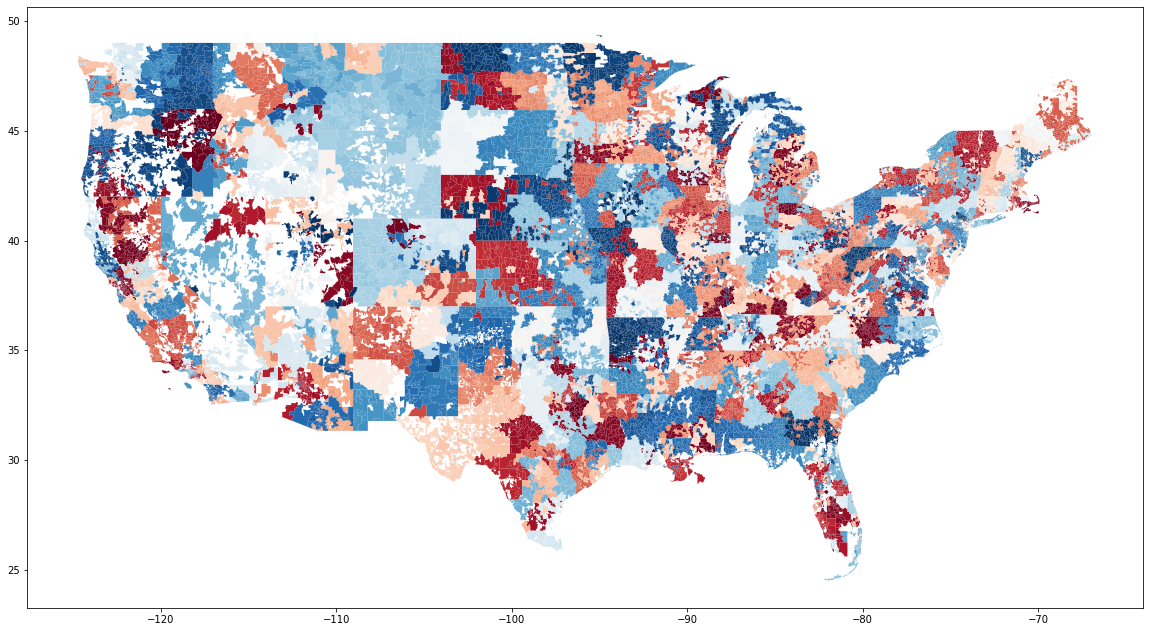

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))
gdf_us_.plot(scheme='quantiles', cmap='RdBu', ax=ax) 

In [97]:
df2003 = pd.read_csv("{0}/{0}_c.csv".format(2003))
df2003_MM = count_keyword(df2003, 'MM')
gdf2003_MM = pd.merge(gdf_us_, df2003_MM, how='left', left_on='ZCTA5CE10', right_on='ZIP_Code')
gdf2003_MM[['With_MM', 'Without_MM']] = gdf2003_MM[['With_MM', 'Without_MM']].fillna(value=0)
#gdf2003_MM
#h = plt.hist(gdf2003_MM[gdf2003_MM['With_MM'] > 5]['With_MM'], bins = 50)

(11591, 934)


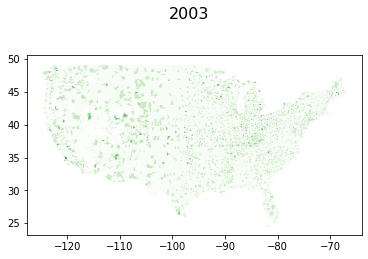

In [100]:
fig, ax = plt.subplots()

gdf2003_MM.plot(column = 'With_MM', ax=ax, #legend=True, \
                legend_kwds={'fontsize': 'xx-small', 'title_fontsize': 'xx-small', 'markerscale': 0.5},\
                cmap='Greens', scheme='user_defined', classification_kwds={'bins':[0, 2, 6, 9]})
#fig.set_title("Number of Facilities with\n Methadone Maintenance ")
#leg = ax.get_legend()
leg.set_title("Number of Facilities with\n Methadone Maintenance ")
#https://matplotlib.org/api/legend_api.html
#fig.suptitle('2003', fontsize=16)
fig.savefig('2003_MM.png', dpi=500, bbox_inches = "tight")

In [101]:
def plot_Met(year, key):
    df = pd.read_csv("{0}/{0}_c.csv".format(year))
    df_MM = count_keyword(df, key)
    gdf_MM = pd.merge(gdf_us_, df_MM, how='left', left_on='ZCTA5CE10', right_on='ZIP_Code')
    gdf_MM[['With_MM', 'Without_MM']] = gdf_MM[['With_MM', 'Without_MM']].fillna(value=0)
    
    fig, ax = plt.subplots()
    gdf_MM.plot(column = 'With_MM', ax=ax, cmap='Greens', scheme='user_defined', classification_kwds={'bins':[0, 2, 6, 9]})
    fig.savefig('{}_MM.png'.format(year), dpi=500, bbox_inches = "tight")

In [108]:
plot_Met(1998)

(11324, 0)


ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

In [41]:
fig, ax = plt.subplots()

gdf2003_MM.plot(column = 'With_MM', ax=ax, legend=True, \
                legend_kwds={'fontsize': 'xx-small', 'title_fontsize': 'xx-small', 'markerscale': 0.5},\
                cmap='Greens', scheme='user_defined', classification_kwds={'bins':[0, 2, 6, 9]})
#fig.set_title("Number of Facilities with\n Methadone Maintenance ")
leg = ax.get_legend()
leg.set_title("Number of Facilities with\n Methadone Maintenance ")
#https://matplotlib.org/api/legend_api.html
fig.suptitle('2003', fontsize=16)
fig.savefig('gdf2003_MM.png', dpi=500, bbox_inches = "tight")

No handles with labels found to put in legend.


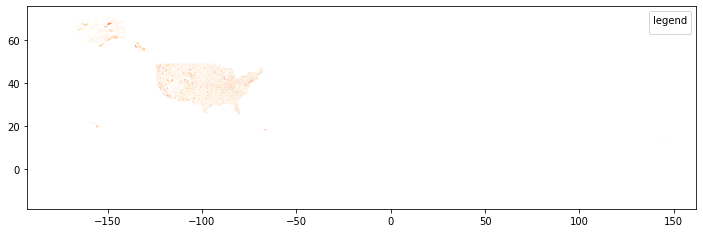

In [70]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf2007_MM.plot(column = 'With_MM', ax=ax, legend=True, cmap='OrRd', scheme='user_defined', classification_kwds={'bins':[0, 2, 6, 9]})
plt.legend(title="legend")
#plt.legend(('0', '1-2', '3-6', '7-9', '>9'), loc='upper center', shadow=True)
fig.savefig('gdf2007_MM.png', dpi=1000, bbox_inches = "tight")